# Mass/Calcification


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import pickle
from sklearn.utils import class_weight
from keras import regularizers
import random
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from tensorflow.keras import models
from google.colab import drive
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
out_path = '/content/drive/MyDrive/Barsellotti_Paolini'

In [3]:
def toRGB(images):
  tmp_images = []
  for image in images:
    reshaped_image = image[0].reshape((150,150,1))
    rgb_image = np.repeat(reshaped_image, 3, 2)
    rgb_image = rgb_image / 65535
    reshaped_image = image[1].reshape((150,150,1))
    rgb_image2 = np.repeat(reshaped_image, 3, 2)
    rgb_image2 = rgb_image / 65535
    tmp_images.append((rgb_image,rgb_image2))

  tmp_images = np.array(tmp_images)
  return tmp_images

In [4]:
def change_label(labels):
  new_labels = list()
  
  for label in labels:
    if label==1 or label==2:#mass
      new_labels.append(0)
    if label==3 or label==4:#calcification
      new_labels.append(1)
  return np.array(new_labels)

In [5]:
def change_label_bm(labels):
  new_labels = list()
  
  for label in labels:
    if label==1 or label==3:#benign
      new_labels.append(0)
    if label==2 or label==4:#malignant
      new_labels.append(1)
  return np.array(new_labels)

In [6]:
# Test set 
predictions1 = np.load(os.path.join(out_path,"miscellaneous/majority_voting_mass_calcification_predictions.npy"))
predictions2 = np.load(os.path.join(out_path,"miscellaneous/averaging_mass_calcification_predictions.npy"))
predictions3 = np.load(os.path.join(out_path,"miscellaneous/stacking_mass_calcification_predictions.npy"))
predictions4 = np.load(os.path.join(out_path,"miscellaneous/stacking_gaussian_mass_calcification_predictions.npy"))

0.907145144646479
0.9099384407358645
0.9111126925950966
0.9139059886844821


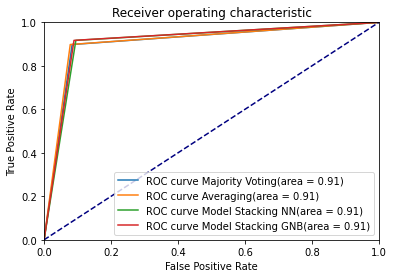

In [7]:
from sklearn import metrics
import seaborn as sn
import pandas as pd

test_images_tensor = np.load(out_path + '/public_test_tensor.npy')
test_images_labels = np.load(out_path + '/public_test_labels.npy')
test_images_tensor_abnormality = test_images_tensor[1::2]
test_images_tensor_baseline = test_images_tensor[0::2]
test_images_labels = test_images_labels[1::2]
test_images_labels = change_label(test_images_labels)


fpr1,tpr1,th1 = metrics.roc_curve(test_images_labels,predictions1)
fpr2,tpr2,th2 = metrics.roc_curve(test_images_labels,predictions2)
fpr3,tpr3,th3 = metrics.roc_curve(test_images_labels,predictions3)
fpr4,tpr4,th4 = metrics.roc_curve(test_images_labels,predictions4)


roc_auc1 = metrics.roc_auc_score(test_images_labels,predictions1)
roc_auc2 = metrics.roc_auc_score(test_images_labels,predictions2)
roc_auc3 = metrics.roc_auc_score(test_images_labels,predictions3)
roc_auc4 = metrics.roc_auc_score(test_images_labels,predictions4)

print(roc_auc1)
print(roc_auc2)
print(roc_auc3)
print(roc_auc4)

from matplotlib import pyplot as plt
plt.figure()
plt.plot(fpr1, tpr1, label='ROC curve Majority Voting(area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='ROC curve Averaging(area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='ROC curve Model Stacking NN(area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='ROC curve Model Stacking GNB(area = %0.2f)' % roc_auc4)


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()



In [8]:
print(metrics.classification_report(test_images_labels, predictions1))
met = metrics.classification_report(test_images_labels, predictions1,output_dict=True)
print(met['macro avg'])
print(met['accuracy'])

print(metrics.classification_report(test_images_labels, predictions2))
met = metrics.classification_report(test_images_labels, predictions2,output_dict=True)
print(met['macro avg'])
print(met['accuracy'])

print(metrics.classification_report(test_images_labels, predictions3))
met = metrics.classification_report(test_images_labels, predictions3,output_dict=True)
print(met['macro avg'])
print(met['accuracy'])

print(metrics.classification_report(test_images_labels, predictions4))
met = metrics.classification_report(test_images_labels, predictions4,output_dict=True)
print(met['macro avg'])
print(met['accuracy'])

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       179
           1       0.90      0.90      0.90       157

    accuracy                           0.91       336
   macro avg       0.91      0.91      0.91       336
weighted avg       0.91      0.91      0.91       336

{'precision': 0.9074786324786325, 'recall': 0.9071451446464791, 'f1-score': 0.907303745761656, 'support': 336}
0.9077380952380952
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       179
           1       0.91      0.90      0.90       157

    accuracy                           0.91       336
   macro avg       0.91      0.91      0.91       336
weighted avg       0.91      0.91      0.91       336

{'precision': 0.910639814649795, 'recall': 0.9099384407358645, 'f1-score': 0.9102564102564104, 'support': 336}
0.9107142857142857
              precision    recall  f1-score   support

           0       0.93      0.

# Benign/Malignant

In [9]:
# Test set 
predictions1 = np.load(os.path.join(out_path,"miscellaneous/majority_voting_benign_malignant_predictions.npy"))
predictions2 = np.load(os.path.join(out_path,"miscellaneous/averaging_benign_malignant_predictions.npy"))
predictions3 = np.load(os.path.join(out_path,"miscellaneous/stacking_benign_malignant_predictions.npy"))
predictions4 = np.load(os.path.join(out_path,"miscellaneous/stacking_svm_bm_predictions.npy"))

0.6934785153963237
0.7068844397611522
0.7513757171291419
0.7490926121063107


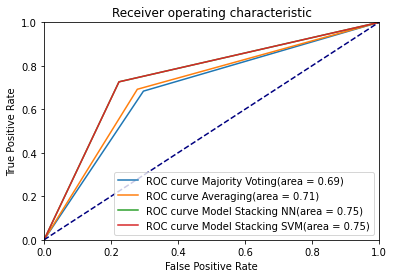

In [10]:
from sklearn import metrics
import seaborn as sn
import pandas as pd

test_images_tensor = np.load(out_path + '/public_test_tensor.npy')
test_images_labels = np.load(out_path + '/public_test_labels.npy')
test_images_tensor_abnormality = test_images_tensor[1::2]
test_images_tensor_baseline = test_images_tensor[0::2]
test_images_labels = test_images_labels[1::2]
test_images_labels = change_label_bm(test_images_labels)


fpr1,tpr1,th1 = metrics.roc_curve(test_images_labels,predictions1)
fpr2,tpr2,th2 = metrics.roc_curve(test_images_labels,predictions2)
fpr3,tpr3,th3 = metrics.roc_curve(test_images_labels,predictions3)
fpr4,tpr4,th4 = metrics.roc_curve(test_images_labels,predictions4)

roc_auc1 = metrics.roc_auc_score(test_images_labels,predictions1)
roc_auc2 = metrics.roc_auc_score(test_images_labels,predictions2)
roc_auc3 = metrics.roc_auc_score(test_images_labels,predictions3)
roc_auc4 = metrics.roc_auc_score(test_images_labels,predictions4)

print(roc_auc1)
print(roc_auc2)
print(roc_auc3)
print(roc_auc4)

from matplotlib import pyplot as plt
plt.figure()
plt.plot(fpr1, tpr1, label='ROC curve Majority Voting(area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='ROC curve Averaging(area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='ROC curve Model Stacking NN(area = %0.2f)' % roc_auc3)
plt.plot(fpr3, tpr3, label='ROC curve Model Stacking SVM(area = %0.2f)' % roc_auc4)



plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()



In [11]:
# F2 metric for BM models
from sklearn.metrics import fbeta_score

print(fbeta_score(test_images_labels, predictions1, beta=2))
print(fbeta_score(test_images_labels, predictions2, beta=2))
print(fbeta_score(test_images_labels, predictions3, beta=2))
print(fbeta_score(test_images_labels, predictions4, beta=2))

0.6525285481239804
0.6639344262295083
0.7059800664451827
0.7048092868988391


In [12]:
print(metrics.classification_report(test_images_labels, predictions1))
met = metrics.classification_report(test_images_labels, predictions1,output_dict=True)
print(met['1'])


print(metrics.classification_report(test_images_labels, predictions2))
met = metrics.classification_report(test_images_labels, predictions2,output_dict=True)
print(met['1'])


print(metrics.classification_report(test_images_labels, predictions3))
met = metrics.classification_report(test_images_labels, predictions3,output_dict=True)
print(met['1'])


print(metrics.classification_report(test_images_labels, predictions4))
met = metrics.classification_report(test_images_labels, predictions4,output_dict=True)
print(met['1'])


              precision    recall  f1-score   support

           0       0.81      0.70      0.75       219
           1       0.55      0.68      0.61       117

    accuracy                           0.70       336
   macro avg       0.68      0.69      0.68       336
weighted avg       0.72      0.70      0.70       336

{'precision': 0.5517241379310345, 'recall': 0.6837606837606838, 'f1-score': 0.6106870229007634, 'support': 117}
              precision    recall  f1-score   support

           0       0.81      0.72      0.77       219
           1       0.57      0.69      0.63       117

    accuracy                           0.71       336
   macro avg       0.69      0.71      0.70       336
weighted avg       0.73      0.71      0.72       336

{'precision': 0.5704225352112676, 'recall': 0.6923076923076923, 'f1-score': 0.6254826254826253, 'support': 117}
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       219
           1 